In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import seaborn as sns

%matplotlib inline

# k-means

(2000, 3008, 3)


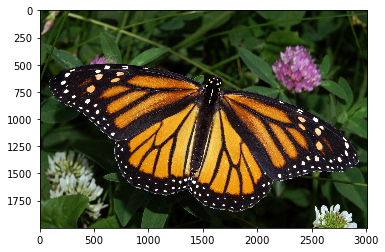

In [2]:
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print(image.shape)
plt.imshow(image);

### Prepare data

In [3]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

pixel_vals = np.float32(pixel_vals)

print(pixel_vals.shape)

(6016000, 3)


### Implement k-means

In [4]:
# define stop criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)

# perfom kmeans
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

print(segmented_data.shape)
print(centers)

(6016000, 3)
[[ 20  23  12]
 [ 61  74  37]
 [204 153  80]]


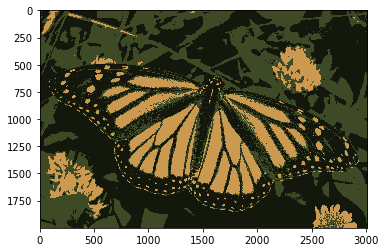

In [5]:
# reshape data into the originals dimensions
segmented_image = segmented_data.reshape(image.shape)
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image);

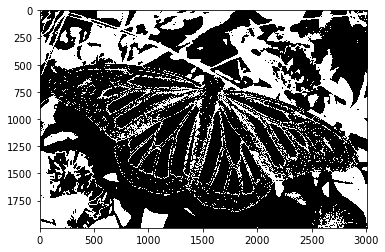

In [6]:
# Visualize one segment, try to find which is the leaves, background, etc!
plt.imshow(labels_reshape==1, cmap='gray')

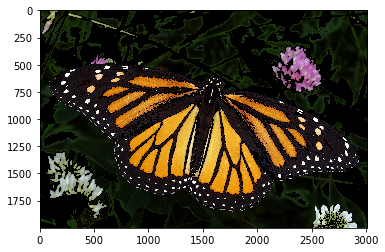

In [7]:
# mask an image segment by cluster
cluster = 1

masked_image = np.copy(image)
masked_image[labels_reshape == cluster] = [0, 0, 0]

plt.imshow(masked_image);

## Corners

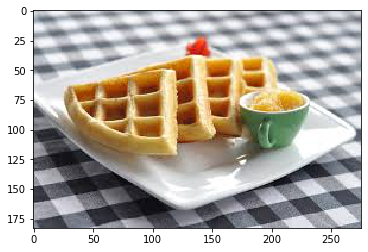

In [8]:
image = cv2.imread('images/waffle.jpg')
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image);

### Detect corners

uint8
float32


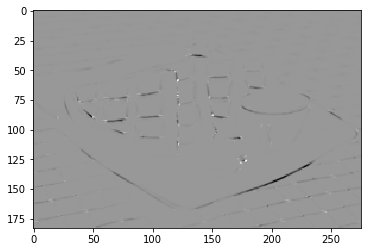

In [9]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(gray.dtype)

# convert to float
gray = np.float32(gray)
print(gray.dtype)

corners = cv2.cornerHarris(gray, 2, 3, 0.04) # 2x2pixels window, 3x3 sobels, 0.4 constant value that helps to determine
                                            # which points are considered corners. 0.04 is typical.

        
plt.imshow(corners, cmap='gray');

The image should have the corners marked as the bright points and non-corners as darker pixels.

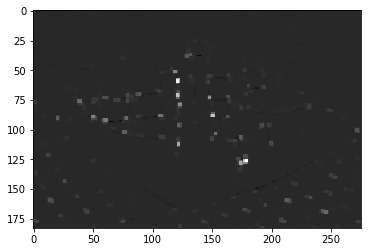

In [10]:
# Dilate corner image to enhance corner points
corners = cv2.dilate(corners, None)

plt.imshow(corners, cmap='gray');

In [11]:
corners.shape

(183, 276)

### Select and display strong corners

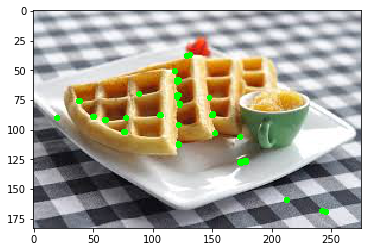

In [12]:
# This value vary depending on the image and how many corners you want to detect
thresh = 0.2*corners.max()

# image with corners
corner_image = np.copy(image)

for y in range(0, corners.shape[0]):
    for x in range(0, corners.shape[1]):
        if(corners[y, x] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle(corner_image, (x, y), 1, (0,255,0), 1)
            
plt.imshow(corner_image);

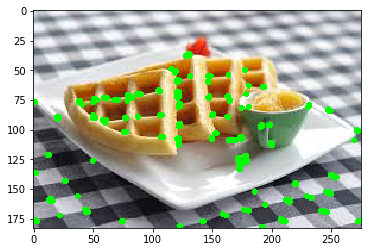

In [13]:
# This value vary depending on the image and how many corners you want to detect
thresh = 0.05*corners.max()

# image with corners
corner_image = np.copy(image)

for y in range(0, corners.shape[0]):
    for x in range(0, corners.shape[1]):
        if(corners[y, x] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle(corner_image, (x, y), 1, (0,255,0), 1)
            
plt.imshow(corner_image);

#### dilation and erosion
La dilatación y la erosión se conocen como operaciones morfológicas. A menudo se realizan en imágenes binarias, similares a la detección de contorno. La dilatación amplía las áreas brillantes y blancas de una imagen al agregar píxeles a los límites percibidos de los objetos en esa imagen. La erosión hace lo contrario: elimina los píxeles a lo largo de los límites de los objetos y reduce el tamaño de los objetos.

¡A menudo estas dos operaciones se realizan en secuencia para mejorar rasgos importantes del objeto!

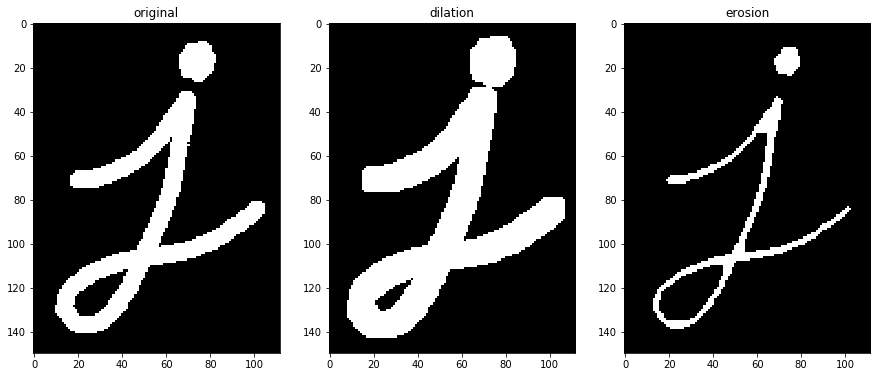

In [14]:
j = cv2.imread('images/j.png', 0)

kernel = np.ones((5,5), np.uint8)

# dilate the image
dilation = cv2.dilate(j, kernel, iterations = 1)

# erosion
erosion = cv2.erode(j, kernel, iterations = 1)

f, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15, 8))

ax0.imshow(j, cmap='gray')
ax0.set_title('original')
ax1.imshow(dilation, cmap='gray')
ax1.set_title('dilation')
ax2.imshow(erosion, cmap='gray')
ax2.set_title('erosion');


## Contours

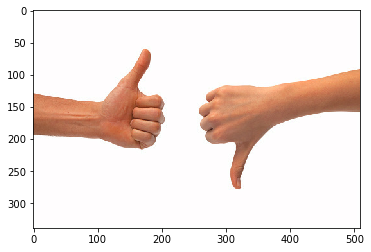

In [15]:
hand = mpimg.imread('images/thumbs_up_down.jpg')

plt.imshow(hand);

### binary image with threshold

(339, 509)


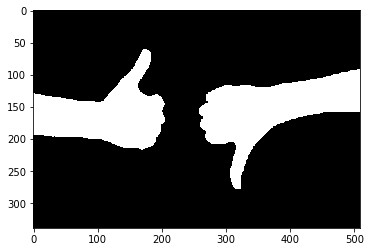

In [16]:
gray = cv2.cvtColor(hand, cv2.COLOR_RGB2GRAY)

retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
print(binary.shape)
plt.imshow(binary, cmap='gray');

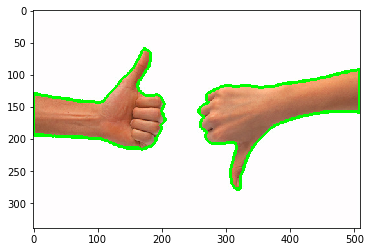

In [17]:
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours_image = np.copy(hand)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image);

### Contour features

Cada contorno tiene una serie de características que puede calcular, incluido el área del contorno, su orientación (la dirección en la que apunta la mayor parte del contorno), su perímetro y muchas otras propiedades descritas en la documentación de OpenCV, aquí.

In [18]:
# area
for contour in contours:
    area = cv2.contourArea(contour)
    print(area)

18140.0
15366.5


In [19]:
# perimeters
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    print(perimeter)


817.5289995670319
698.4579323530197


In [20]:
# orientation
for contour in contours:
    (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
    print(angle)

angles = []
def orientation(contours):
    
    for contour in contours:
        (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
        angles.append(angle)
    
    return angles

orientation(contours)

61.35833740234375
82.27550506591797


[61.35833740234375, 82.27550506591797]

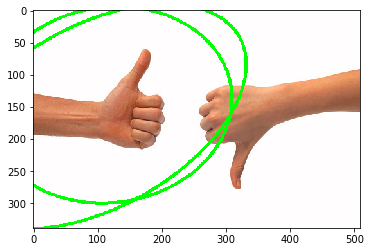

In [21]:
# draw ellipse
hand_el = np.copy(hand)
for contour in contours:
    (x,y), (MA,ma), angle = cv2.fitEllipse(contour)
    (x,y), (MA,ma), angle = np.uint8((x,y)), np.uint8((MA,ma)), np.uint8(angle)
    
    cv2.ellipse(hand_el, (x,y), (MA,ma), angle, 0, 360, [0,255,0], 3)

plt.imshow(hand_el)

### Bounding Rectangle

In the next cell, you'll be asked to find the bounding rectangle around the *left* hand contour, which has its thumb up, then use that bounding rectangle to crop the image and better focus on that one hand!

```python
# Find the bounding rectangle of a selected contour
x,y,w,h = cv2.boundingRect(selected_contour)

# Draw the bounding rectangle as a purple box
box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
```

And to crop the image, select the correct width and height of the image to include.

```python
# Crop using the dimensions of the bounding rectangle (x, y, w, h)
cropped_image = image[y: y + h, x: x + w] 
```

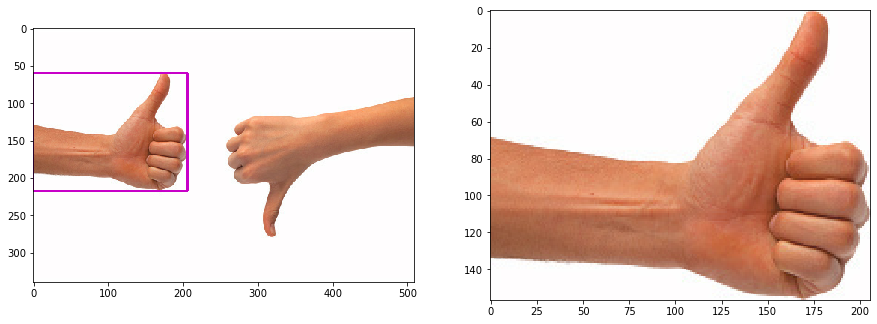

In [22]:
def hand_crop(image, selected_contour):
    
    # image copy
    cropped_image = np.copy(image)
    
    # boundingrect
    x,y,w,h = cv2.boundingRect(contours[1])
    
    # draw rectangle
    box_image = cv2.rectangle(cropped_image, (x,y), (x+w,y+h), (200,0,200),2)
    
    cropped_image = image[y: y + h, x: x + w] 
    
    return box_image, cropped_image
    
    
select_contour = contours[1]
rect_img, crop_img = hand_crop(hand, select_contour)


f, (ax0, ax1) = plt.subplots(1,2, figsize=(15, 8))

ax0.imshow(rect_img)
ax1.imshow(crop_img);